<a href="https://colab.research.google.com/github/DmitryKutsev/ml_hw/blob/master/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2020-02-13 06:20:39--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  21.7MB/s    in 5.1s    

2020-02-13 06:20:45 (15.7 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [2]:
!ls
!gunzip aclImdb_v1.tar.gz
!tar -xvf aclImdb_v1.tar 

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/44954_0.txt
aclImdb/train/unsup/4

In [16]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, 
                                 shuffle=True, random_state=0)
twenty_test.target

array([2, 3, 3, ..., 2, 0, 3])

In [0]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot

In [0]:
count = []
counter = 0

In [128]:
import os
texts, labels = [], []
for text in os.listdir('aclImdb/train/pos'):
  with open('aclImdb/train/pos/' + str(text), 'r') as handler:
    texts.append(handler.read())
    labels.append('positive')
    count.append(counter)
    counter += 1
handler.close()
for text in os.listdir('aclImdb/train/neg'):
  with open('aclImdb/train/neg/' + str(text), 'r') as handler:
    texts.append(handler.read())
    labels.append('negative')
    count.append(counter)
    counter += 1
handler.close()
print(texts[-1])
labels[-1]

A difficult film to categorize. I was never giving it 110% concentration & consequently as simple as the plot appeared I couldn't say for certain exactly who was doing what amongst the American FBI characters & what their roles were. Nor could I take the Irwins seriously as film characters when their lines & scenes were all in the style of one of his shows, not acted out.<br /><br />This is nothing more than a glorified episode of a Discovery TV show, with a largely insignificant sub plot going on, which just seemed to get in the way. However as any Irwin show is always worth a watch, this film is well worth a look too, but not on Christmas Day. Talking of which, I've better things to do too than be on here.<br /><br />A high 4/10


'negative'

In [129]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(texts) #Learn the vocabulary dictionary and return term-document matrix.
X_train_counts.shape

(25000, 74849)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier().fit(X_train_counts, labels)

In [0]:
test_count = []
test_counter = 0

In [132]:
import os
test_texts, test_labels = [], []
for text in os.listdir('aclImdb/test/pos'):
  with open('aclImdb/test/pos/' + str(text), 'r') as handler:
    test_texts.append(handler.read())
    test_labels.append('positive')
    test_count.append(counter)
    test_counter += 1
handler.close()
for text in os.listdir('aclImdb/test/neg'):
  with open('aclImdb/test/neg/' + str(text), 'r') as handler:
    test_texts.append(handler.read())
    test_labels.append('negative')
    test_count.append(counter)
    test_counter += 1
handler.close()
print(test_texts[-1])
test_labels[-1]

Talk about marketing. The poster/home video cover of 'The New Twenty' broadcasts a half-naked male in a "Wolfe Video." For those familiar with the gay-themed movies  this broadcasts a "must-see." (I loved reading one reviewer (from another site) stating they had been "tricked" into seeing a "Sodomite" movie. Are you serious? The tagline itself as the word "gay." The Lord gives you eyes, yet you cannot see) That being said, despite the number of gay characters, stereotyped, no less (see: the lonely gay, the AIDS victim gay and the closeted gay) it's more about long-term friendship and characters that grow apart. In fact, if anything, there's more (here's one for Christians to complain about) heterosexual couples having sex outside of, gasp!, marriage. Not to mention backstabbing, drinking to excess and drug usage. I see this more of a made for TV-Logo or Showtime movie than big screen effort. Sure, I loved the cinematography, some of the actors could act and I always love seeing a big

'negative'

In [133]:
X_test = count_vect.transform(test_texts) #Learn the vocabulary dictionary and return term-document matrix.
X_test.shape

(25000, 74849)

In [134]:
from sklearn.metrics import *

predicted = clf.predict(X_test)
predicted_proba = clf.predict_proba(X_test)
predicted_proba[:5]

array([[0. , 1. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.2, 0.8]])

In [135]:
acc = accuracy_score(predicted, test_labels)
micro_f1 = f1_score(predicted, test_labels, average = 'micro')
micro_p = precision_score(predicted, test_labels, average = 'micro')
micro_r = recall_score(predicted, test_labels, average = 'micro')
macro_f1 = f1_score(predicted, test_labels, average = 'macro')
macro_p = precision_score(predicted, test_labels, average = 'macro')
macro_r = recall_score(predicted, test_labels, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.6234
micro F1=0.6234, micro P=0.6234, micro R=0.6234
macro F1=0.6215, macro P=0.6234, macro R=0.6260



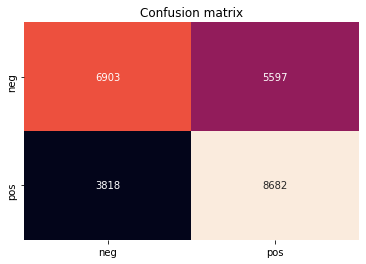

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
categories = ['neg', 'pos']
sns.heatmap(data=confusion_matrix(test_labels, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

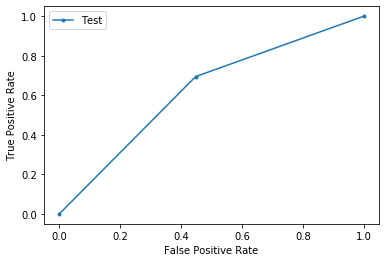

In [137]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot
y_true = []
for i in test_labels:
  if i == 'positive':
    y = 1
  else:
    y = 0
  y_true.append(y)


y_predicted = []
for i in predicted:
  if i == 'positive':
    y = 1
  else:
    y = 0
  y_predicted .append(y)
y_predicted[:3]


predicted, test_labels
y_true = np.array(y_true)
y_predicted = np.array(y_predicted)
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [140]:
tp = 0
tn = 0
fp = 0
fn = 0

for pred_num in range(len(predicted)):
    if predicted[pred_num] == test_labels[pred_num] and predicted[pred_num]  == 'positive':
      tp += 1
    elif predicted[pred_num] != test_labels[pred_num] and predicted[pred_num]  == 'positive':
      fp += 1 
    elif predicted[pred_num] == test_labels[pred_num] and predicted[pred_num]  == 'negative':
      tn +=1
    elif predicted[pred_num] != test_labels[pred_num] and predicted[pred_num]  == 'negative': 
      fn +=1
print('tp', tp,'fp', fp,'tn', tn,'fn', fn)


tp 8682 fp 5597 tn 6903 fn 3818


In [0]:




my_pr = tp/(tp + fp)
my_rec = tp/(tp + fn)
my_f1 = f1_score(predicted, test_labels, average = 'macro')
my_acc = accuracy_score(predicted, test_labels)

print('my_acc={0:1.4f}'.format(my_acc))
print('my_micro F1={0:1.4f}, my_micro P={1:1.4f}, my_micro R={2:1.4f}'.format(my_micro_f1, my_micro_p, my_micro_r))
print('my_macro F1={0:1.4f}, my_macro P={1:1.4f}, my_macro R={2:1.4f}\n'.format(my_macro_f1, my_macro_p, my_macro_r))

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_counts, labels)
predicted = clf.predict(X_test)

In [112]:
acc = accuracy_score(predicted, test_labels)
micro_f1 = f1_score(predicted, test_labels, average = 'micro')
micro_p = precision_score(predicted, test_labels, average = 'micro')
micro_r = recall_score(predicted, test_labels, average = 'micro')
macro_f1 = f1_score(predicted, test_labels, average = 'macro')
macro_p = precision_score(predicted, test_labels, average = 'macro')
macro_r = recall_score(predicted, test_labels, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8136
micro F1=0.8136, micro P=0.8136, micro R=0.8136
macro F1=0.8128, macro P=0.8136, macro R=0.8190



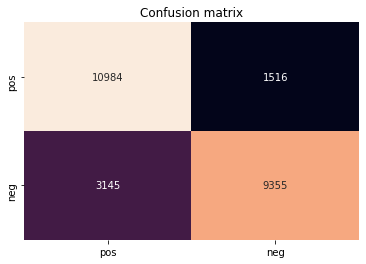

In [113]:
sns.heatmap(data=confusion_matrix(test_labels, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

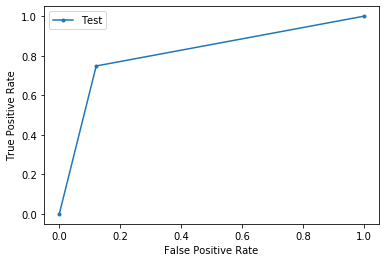

In [114]:
y_true = []
for i in test_labels:
  if i == 'positive':
    y = 1
  else:
    y = 0
  y_true.append(y)


y_predicted = []
for i in predicted:
  if i == 'positive':
    y = 1
  else:
    y = 0
  y_predicted .append(y)
y_predicted[:3]


predicted, test_labels
y_true = np.array(y_true)
y_predicted = np.array(y_predicted)
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [115]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train_counts, labels)
predicted = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [116]:
acc = accuracy_score(predicted, test_labels)
micro_f1 = f1_score(predicted, test_labels, average = 'micro')
micro_p = precision_score(predicted, test_labels, average = 'micro')
micro_r = recall_score(predicted, test_labels, average = 'micro')
macro_f1 = f1_score(predicted, test_labels, average = 'macro')
macro_p = precision_score(predicted, test_labels, average = 'macro')
macro_r = recall_score(predicted, test_labels, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8648
micro F1=0.8648, micro P=0.8648, micro R=0.8648
macro F1=0.8648, macro P=0.8648, macro R=0.8649



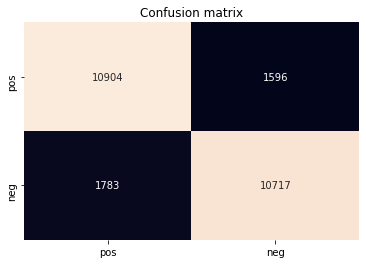

In [117]:
sns.heatmap(data=confusion_matrix(test_labels, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

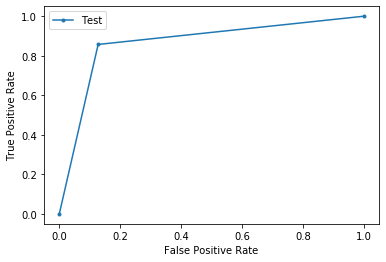

In [118]:

y_true = []
for i in test_labels:
  if i == 'positive':
    y = 1
  else:
    y = 0
  y_true.append(y)


y_predicted = []
for i in predicted:
  if i == 'positive':
    y = 1
  else:
    y = 0
  y_predicted .append(y)
y_predicted[:3]


predicted, test_labels
y_true = np.array(y_true)
y_predicted = np.array(y_predicted)
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [119]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_counts, labels)
predicted = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [120]:
acc = accuracy_score(predicted, test_labels)
micro_f1 = f1_score(predicted, test_labels, average = 'micro')
micro_p = precision_score(predicted, test_labels, average = 'micro')
micro_r = recall_score(predicted, test_labels, average = 'micro')
macro_f1 = f1_score(predicted, test_labels, average = 'macro')
macro_p = precision_score(predicted, test_labels, average = 'macro')
macro_r = recall_score(predicted, test_labels, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.8458
micro F1=0.8458, micro P=0.8458, micro R=0.8458
macro F1=0.8457, macro P=0.8458, macro R=0.8459



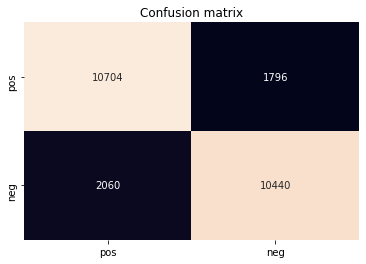

In [121]:
sns.heatmap(data=confusion_matrix(test_labels, predicted), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

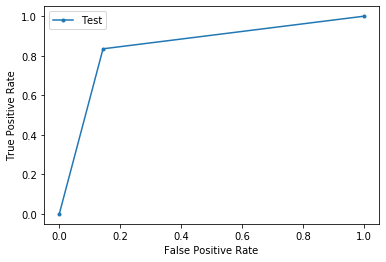

In [122]:

y_true = []
for i in test_labels:
  if i == 'positive':
    y = 1
  else:
    y = 0
  y_true.append(y)


y_predicted = []
for i in predicted:
  if i == 'positive':
    y = 1
  else:
    y = 0
  y_predicted .append(y)
y_predicted[:3]


predicted, test_labels
y_true = np.array(y_true)
y_predicted = np.array(y_predicted)
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()